# Chemoinformatics of Molecules and Compounds

## Molecular graph generation and accessing atom and bond features

In [1]:
#pip install rdkit

In [2]:
#pip install mordred

In [3]:
import rdkit

In [34]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

from mordred import Calculator, descriptors

import numpy as np
import pandas as pd

### Molecular Graph

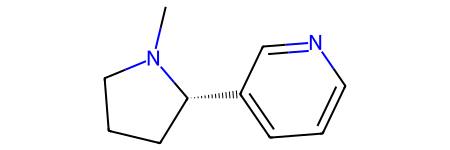

In [5]:
#Molecular graph
mol1 = Chem.MolFromSmiles("CN1CCC[C@H]1c2cccnc2")
mol1


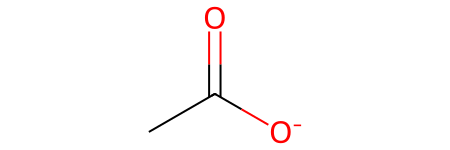

In [6]:
mol2 = Chem.MolFromSmiles("CC(=O)[O-]")
mol2

In [7]:
mol1.GetAtoms()[1].GetAtomicNum()

7

In [8]:
#Access atomic symbols in molecule
atom_symbols = []
for atom in mol1.GetAtoms():
    atom_symbols.append(atom.GetSymbol())

atom_symbols

['C', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'N', 'C']

In [9]:
mol2.GetAtoms()[3].GetAtomicNum()

8

In [10]:
atm_symbols = [atom.GetSymbol() for atom in mol2.GetAtoms()]
atm_symbols

['C', 'C', 'O', 'O']

In [11]:
#Calculating total hydrogen
num_hydrogens = [atom.GetTotalNumHs(includeNeighbors=True) for atom in mol2.GetAtoms()]
num_hydrogens

[3, 0, 0, 0]

### Information about atoms

In [12]:
#Information about the atoms
def atom_info(mol):
    for atom in mol.GetAtoms():
        print(atom.GetIdx(),
              atom.GetSymbol(),
              atom.GetAtomicNum(),
              atom.GetMass(),
              atom.GetHybridization(),
              atom.GetFormalCharge(),
              atom.GetDegree(),
              atom.GetTotalNumHs(includeNeighbors=True),
              atom.GetExplicitValence(),
              atom.GetIsAromatic())

In [13]:
atom_info(mol1)

0 C 6 12.011 SP3 0 1 3 1 False
1 N 7 14.007 SP3 0 3 0 3 False
2 C 6 12.011 SP3 0 2 2 2 False
3 C 6 12.011 SP3 0 2 2 2 False
4 C 6 12.011 SP3 0 2 2 2 False
5 C 6 12.011 SP3 0 3 1 4 False
6 C 6 12.011 SP2 0 3 0 4 True
7 C 6 12.011 SP2 0 2 1 3 True
8 C 6 12.011 SP2 0 2 1 3 True
9 C 6 12.011 SP2 0 2 1 3 True
10 N 7 14.007 SP2 0 2 0 3 True
11 C 6 12.011 SP2 0 2 1 3 True


In [14]:
#Accessing bonds from a molecule

[bond.GetBondTypeAsDouble() for bond in mol1.GetBonds()]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.0, 1.5]

### Information about bonds

In [15]:
#Info about the bonds
def bond_info(mol):
    for bond in mol.GetBonds():
        print(bond.GetBondTypeAsDouble(),
              bond.GetBeginAtomIdx(),
              bond.GetEndAtomIdx(),
              bond.IsInRing())

In [16]:
bond_info(mol1)

1.0 0 1 False
1.0 1 2 True
1.0 2 3 True
1.0 3 4 True
1.0 4 5 True
1.0 5 6 False
1.5 6 7 True
1.5 7 8 True
1.5 8 9 True
1.5 9 10 True
1.5 10 11 True
1.0 5 1 True
1.5 11 6 True


### Function to calculate Molecular properties

In [17]:
#Calculate molecular properties
def mol_properties(smile):
    MWt = []
    logp = []
    tpsa = []
    H_acceptors = []
    H_donors = []
    
    mols = [Chem.MolFromSmiles(smi) for smi in molecule_list]
    for mol in mols:
        #Molecular weight
        mwt = Descriptors.MolWt(mol)
        MWt.append(mwt)
        
        lgp = Descriptors.MolLogP(mol)
        logp.append(lgp)
        
        #Polar surface area
        psa = Descriptors.TPSA(mol)
        tpsa.append(psa)
        
        #Hydrogen acceptors
        hya = Descriptors.NumHAcceptors(mol)
        H_acceptors.append(hya)
        
        #Hydrogen Donors
        hyd = Descriptors.NumHDonors(mol)
        H_donors.append(hyd)
    return MWt, logp, tpsa, H_acceptors, H_donors

#### User input for single molecule

In [ ]:
#OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H]2[C@@H]1c3c(O)c(OC)c(O)cc3C(=O)O2

In [18]:
user_mol_string = input("Enter the molecule in SMILES format: ")

Enter the molecule in SMILES format: OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H]2[C@@H]1c3c(O)c(OC)c(O)cc3C(=O)O2


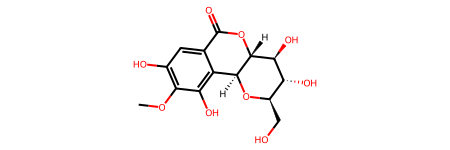

In [19]:
user_mol = Chem.MolFromSmiles(user_mol_string)
user_mol


In [20]:
print("Atoms info")
atom_info(user_mol)

Atoms info
0 O 8 15.999 SP3 0 1 1 1 False
1 C 6 12.011 SP3 0 2 2 2 False
2 C 6 12.011 SP3 0 3 1 4 False
3 O 8 15.999 SP3 0 2 0 2 False
4 C 6 12.011 SP3 0 3 1 4 False
5 O 8 15.999 SP3 0 1 1 1 False
6 C 6 12.011 SP3 0 3 1 4 False
7 O 8 15.999 SP3 0 1 1 1 False
8 C 6 12.011 SP3 0 3 1 4 False
9 C 6 12.011 SP3 0 3 1 4 False
10 C 6 12.011 SP2 0 3 0 4 True
11 C 6 12.011 SP2 0 3 0 4 True
12 O 8 15.999 SP2 0 1 1 1 False
13 C 6 12.011 SP2 0 3 0 4 True
14 O 8 15.999 SP2 0 2 0 2 False
15 C 6 12.011 SP3 0 1 3 1 False
16 C 6 12.011 SP2 0 3 0 4 True
17 O 8 15.999 SP2 0 1 1 1 False
18 C 6 12.011 SP2 0 2 1 3 True
19 C 6 12.011 SP2 0 3 0 4 True
20 C 6 12.011 SP2 0 3 0 4 False
21 O 8 15.999 SP2 0 1 0 2 False
22 O 8 15.999 SP2 0 2 0 2 False


In [21]:
print("Bonds info")
bond_info(user_mol)

Bonds info
1.0 0 1 False
1.0 1 2 False
1.0 2 3 True
1.0 2 4 True
1.0 4 5 False
1.0 4 6 True
1.0 6 7 False
1.0 6 8 True
1.0 8 9 True
1.0 9 10 True
1.5 10 11 True
1.0 11 12 False
1.5 11 13 True
1.0 13 14 False
1.0 14 15 False
1.5 13 16 True
1.0 16 17 False
1.5 16 18 True
1.5 18 19 True
1.0 19 20 True
2.0 20 21 False
1.0 20 22 True
1.0 9 3 True
1.0 22 8 True
1.5 19 10 True


In [22]:
#molecule_list = ['C(=O)[O-]', 'CCC', 'CCO', 'c1ccccc1', 'C1CC(=O)C1']

#### Molecules list input from User

In [23]:
molecule_list = []
num_molecules = int(input("Enter the number of molecules :"))

Enter the number of molecules :5


In [24]:
#['O=Cc1ccc(O)c(OC)c1COc1cc(C=O)ccc1O', 'CN1CCC[C@H]1c2cccnc2', 'c1c(N(=O)=O)cccc1', 'O=C1C=CC(=O)C=C1', 'CC(C)C(=O)O']

In [25]:
for i in range(num_molecules):
    smile_mol = input("Enter molecule "+str(i+1)+": ")
    molecule_list.append(smile_mol)

Enter molecule 1: O=Cc1ccc(O)c(OC)c1COc1cc(C=O)ccc1O
Enter molecule 2: CN1CCC[C@H]1c2cccnc2
Enter molecule 3: c1c(N(=O)=O)cccc1
Enter molecule 4: O=C1C=CC(=O)C=C1
Enter molecule 5: CC(C)C(=O)O


In [26]:
print(molecule_list)

['O=Cc1ccc(O)c(OC)c1COc1cc(C=O)ccc1O', 'CN1CCC[C@H]1c2cccnc2', 'c1c(N(=O)=O)cccc1', 'O=C1C=CC(=O)C=C1', 'CC(C)C(=O)O']


In [27]:
MWt, logp, tpsa, H_acceptors, H_donors = mol_properties(molecule_list)

In [28]:
MWt, logp, tpsa, H_acceptors, H_donors

([302.282, 162.236, 123.11099999999996, 108.09599999999999, 88.10599999999998],
 [2.310400000000001, 1.8483, 1.5948, 0.25059999999999993, 0.727],
 [93.06000000000002, 16.130000000000003, 43.14, 34.14, 37.3],
 [6, 2, 2, 2, 1],
 [2, 0, 0, 0, 1])

In [29]:
for i in range(num_molecules):
    user_mols = [Chem.MolFromSmiles(smi) for smi in molecule_list]
for mol in user_mols:
    print("Atoms info")
    atom_info(mol)
    print("Bonds info")
    bond_info(mol)

Atoms info
0 O 8 15.999 SP2 0 1 0 2 False
1 C 6 12.011 SP2 0 2 1 3 False
2 C 6 12.011 SP2 0 3 0 4 True
3 C 6 12.011 SP2 0 2 1 3 True
4 C 6 12.011 SP2 0 2 1 3 True
5 C 6 12.011 SP2 0 3 0 4 True
6 O 8 15.999 SP2 0 1 1 1 False
7 C 6 12.011 SP2 0 3 0 4 True
8 O 8 15.999 SP2 0 2 0 2 False
9 C 6 12.011 SP3 0 1 3 1 False
10 C 6 12.011 SP2 0 3 0 4 True
11 C 6 12.011 SP3 0 2 2 2 False
12 O 8 15.999 SP2 0 2 0 2 False
13 C 6 12.011 SP2 0 3 0 4 True
14 C 6 12.011 SP2 0 2 1 3 True
15 C 6 12.011 SP2 0 3 0 4 True
16 C 6 12.011 SP2 0 2 1 3 False
17 O 8 15.999 SP2 0 1 0 2 False
18 C 6 12.011 SP2 0 2 1 3 True
19 C 6 12.011 SP2 0 2 1 3 True
20 C 6 12.011 SP2 0 3 0 4 True
21 O 8 15.999 SP2 0 1 1 1 False
Bonds info
2.0 0 1 False
1.0 1 2 False
1.5 2 3 True
1.5 3 4 True
1.5 4 5 True
1.0 5 6 False
1.5 5 7 True
1.0 7 8 False
1.0 8 9 False
1.5 7 10 True
1.0 10 11 False
1.0 11 12 False
1.0 12 13 False
1.5 13 14 True
1.5 14 15 True
1.0 15 16 False
2.0 16 17 False
1.5 15 18 True
1.5 18 19 True
1.5 19 20 True
1.0 2

## Molecular Descriptors

In [30]:
stacked = np.vstack([molecule_list, MWt, logp, tpsa, H_acceptors, H_donors]).T
stacked

array([['O=Cc1ccc(O)c(OC)c1COc1cc(C=O)ccc1O', '302.282',
        '2.310400000000001', '93.06000000000002', '6', '2'],
       ['CN1CCC[C@H]1c2cccnc2', '162.236', '1.8483',
        '16.130000000000003', '2', '0'],
       ['c1c(N(=O)=O)cccc1', '123.11099999999996', '1.5948', '43.14',
        '2', '0'],
       ['O=C1C=CC(=O)C=C1', '108.09599999999999', '0.25059999999999993',
        '34.14', '2', '0'],
       ['CC(C)C(=O)O', '88.10599999999998', '0.727', '37.3', '1', '1']],
      dtype='<U34')

In [31]:
columns = ['Molecule SMILES', 'Molecular Weight', 'logp', 'TPSA', 'H_acceptors', 'H_donors']

In [32]:
df = pd.DataFrame(data=stacked, columns=columns)

In [33]:
df

,Molecule SMILES,Molecular Weight,logp,TPSA,H_acceptors,H_donors
0,O=Cc1ccc(O)c(OC)c1COc1cc(C=O)ccc1O,302.282,2.310400000000001,93.06000000000002,6,2
1,CN1CCC[C@H]1c2cccnc2,162.236,1.8483,16.130000000000003,2,0
2,c1c(N(=O)=O)cccc1,123.11099999999996,1.5948,43.14,2,0
3,O=C1C=CC(=O)C=C1,108.09599999999999,0.25059999999999993,34.14,2,0
4,CC(C)C(=O)O,88.10599999999998,0.727,37.3,1,1


In [35]:
#https://zivgitlab.uni-muenster.de/m_kueh11/fp-dm-tool
dataset = pd.read_csv('/Users/sshinde/Desktop/Orbital_Energies_input_data.csv')
dataset.shape

(2904, 2)

In [36]:
dataset.head()

,SMILES,Energygap
0,Cc1ccc(cc1)C(F)(F)F,197.749421
1,OC(=O)CCCCl,247.493942
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327
3,Nc1ccc(Cl)c(Cl)c1,169.027707
4,C[C@@H](CCO)CCC=C(C)C,209.569808


In [41]:
#Canonical SMILES

def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

In [42]:
Canon_SMILES = canonical_smiles(dataset.SMILES)
len(Canon_SMILES)

2904

In [43]:
dataset['SMILES'] = Canon_SMILES
dataset

,SMILES,Energygap
0,Cc1ccc(C(F)(F)F)cc1,197.749421
1,O=C(O)CCCCl,247.493942
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327
3,Nc1ccc(Cl)c(Cl)c1,169.027707
4,CC(C)=CCC[C@@H](C)CCO,209.569808
...,...,...
2899,c1ccc(P(CCP(c2ccccc2)c2ccccc2)c2ccccc2)cc1,168.649319
2900,Brc1cccc2sccc12,162.928319
2901,CCOC(=O)N1c2ccccc2C=C[C@@H]1OCC,165.098245
2902,c1ccc2sccc2c1,167.958431


In [44]:
duplicates_smiles = dataset[dataset['SMILES'].duplicated()]['SMILES'].values
len(duplicates_smiles)

31

In [45]:
#Duplicate smiles
dataset[dataset['SMILES'].isin(duplicates_smiles)].sort_values(by=['SMILES'])

,SMILES,Energygap
218,C1=CCCCCCC1,214.097913
2125,C1=CCCCCCC1,214.097913
1901,C1CC[C@H]2CCCC[C@@H]2C1,251.144790
552,C1CC[C@H]2CCCC[C@@H]2C1,251.144790
554,C=CN1CCCC1=O,190.834900
1808,C=CN1CCCC1=O,190.835527
2203,C=Cc1ccccc1,168.467969
1354,C=Cc1ccccc1,168.475499
2341,C=Cc1ccccc1,168.490559
1265,C=Cc1ccncc1,174.833420


### Delete Duplicate SMILES

In [46]:
#Delete the Duplicate smiles

dataset_new = dataset.drop_duplicates(subset=['SMILES'])
len(dataset_new)

2873

In [47]:
dataset_new

,SMILES,Energygap
0,Cc1ccc(C(F)(F)F)cc1,197.749421
1,O=C(O)CCCCl,247.493942
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327
3,Nc1ccc(Cl)c(Cl)c1,169.027707
4,CC(C)=CCC[C@@H](C)CCO,209.569808
...,...,...
2899,c1ccc(P(CCP(c2ccccc2)c2ccccc2)c2ccccc2)cc1,168.649319
2900,Brc1cccc2sccc12,162.928319
2901,CCOC(=O)N1c2ccccc2C=C[C@@H]1OCC,165.098245
2902,c1ccc2sccc2c1,167.958431


## Calculate descriptors using RDkit

#### RDkit's 200 molecular descriptors

In [49]:
#Descriptor names
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors = []
    for mol in mols:
        mol = Chem.AddHs(mol)
        
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors, desc_names

Mol_descriptors, desc_names = RDkit_descriptors(dataset_new['SMILES'])

In [50]:
df_200_descriptors = pd.DataFrame(Mol_descriptors, columns = desc_names)
df_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.550510,-5.076351,12.550510,1.008796,0.546828,160.138,153.082,160.049985,60,0,...,0,0,0,0,0,0,0,0,0,0
1,10.676844,-3.333333,10.676844,1.840718,0.569323,122.551,115.495,122.013457,42,0,...,0,0,0,0,0,0,0,0,0,0
2,13.050084,-4.111425,13.050084,0.722809,0.790287,361.825,341.665,361.108086,132,0,...,0,0,0,0,0,0,0,0,0,0
3,7.402685,-0.449630,7.402685,0.074321,0.582519,162.019,156.979,160.979905,48,0,...,0,0,0,0,0,0,0,0,0,0
4,8.095237,-4.484184,8.095237,1.886963,0.606746,156.269,136.109,156.151415,66,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,9.505488,-3.873136,9.505488,0.973292,0.373065,398.426,374.234,398.135324,138,0,...,0,0,0,0,0,0,0,0,0,0
2869,7.651157,-0.170718,7.651157,0.017477,0.625891,213.099,208.059,211.929533,50,0,...,0,0,0,0,0,0,0,1,0,0
2870,13.017078,-3.813937,13.017078,0.325694,0.823664,247.294,230.158,247.120843,96,0,...,0,0,0,0,0,0,0,0,0,0
2871,7.592407,-0.348333,7.592407,0.030556,0.519376,134.203,128.155,134.019021,44,0,...,0,0,0,0,0,0,0,1,0,0


## Calculate Molecular Fingerprints (Morgan)

In [55]:
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i)
        #Using molecular graph to calculate fingerprint
        fpts = AllChem.GetMorganFingerprintAsBitVect(mol, 2, 1024)
        #Convert into numpy array and append
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)
    return np.array(Morgan_fpts)

In [56]:
Morgan_fpts = morgan_fpts(dataset_new['SMILES'])
Morgan_fpts.shape

(2873, 1024)

In [57]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts, columns=['Col_{}'.format(i)
                                                         for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_1014,Col_1015,Col_1016,Col_1017,Col_1018,Col_1019,Col_1020,Col_1021,Col_1022,Col_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Calculate molecular descriptors using Mordred (1826)

In [58]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D = False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    df = calc.pandas(mols)
    return df

In [59]:
mordred_descriptors = All_Mordred_descriptors(dataset_new['SMILES'])

100%|███████████████████████████████████████| 2873/2873 [01:10<00:00, 40.79it/s]


In [60]:
mordred_descriptors.shape

(2873, 1826)

In [61]:
mordred_descriptors

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,8.302711,7.763360,0,0,12.527341,2.311476,4.622953,12.527341,1.138849,3.302522,...,9.182249,41.326257,160.049985,8.891666,152,13,54.0,59.0,5.284722,2.333333
1,4.461420,4.736714,1,0,7.727407,1.931852,3.863703,7.727407,1.103915,2.752227,...,7.321850,31.336140,122.013457,8.715247,52,4,24.0,22.0,3.861111,1.833333
2,19.038123,14.818400,1,0,30.648742,2.324224,4.648448,30.648742,1.225950,4.118873,...,9.931735,59.295845,361.108086,8.024624,1882,35,124.0,139.0,9.729167,5.486111
3,6.651690,6.355891,0,0,10.792280,2.245827,4.491654,10.792280,1.199142,3.099448,...,8.806724,37.839725,160.979905,11.498565,84,10,42.0,46.0,4.083333,2.027778
4,7.399237,7.388977,0,0,12.133645,2.047810,4.095621,12.133645,1.103059,3.219224,...,8.131825,38.565088,156.151415,5.037142,194,9,42.0,41.0,5.472222,2.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,21.758550,17.000581,0,0,38.253985,2.374938,4.749876,38.253985,1.366214,4.258939,...,10.073357,62.971588,398.135324,7.656449,2014,41,142.0,164.0,6.166667,6.361111
2869,7.806684,7.343579,0,0,13.098358,2.369838,4.633950,13.098358,1.309836,3.261311,...,9.161465,53.745115,211.929533,14.128636,105,12,52.0,61.0,2.833333,2.222222
2870,13.382658,11.741399,0,0,22.978744,2.442763,4.885526,22.978744,1.276597,3.800055,...,9.763593,50.871918,247.120843,7.060596,574,28,88.0,103.0,6.055556,4.277778
2871,7.030628,6.547610,0,0,12.170709,2.322596,4.516123,12.170709,1.352301,3.160409,...,8.914761,51.887188,134.019021,8.934601,79,9,46.0,53.0,1.972222,2.027778
